In [1]:
%pylab inline
import torch
# Making sure we can find the data loader
import sys
sys.path.append('..')
sys.path.append('../..')
from data import load

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Let's load the dataset
train_data, train_label = load.get_dogs_and_cats_data(resize=(32,32), n_images=100)
input_size = 32*32*3
to_image = load.to_image_transform()

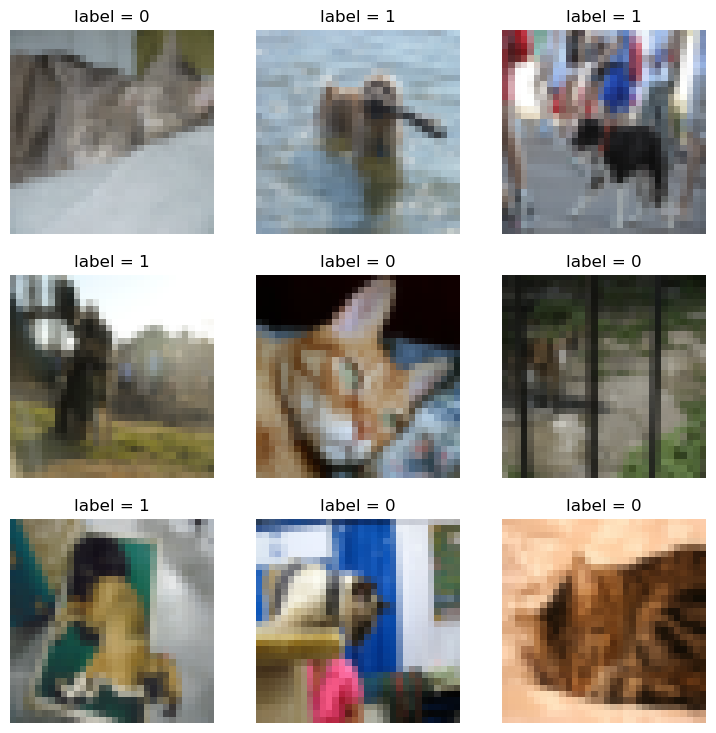

In [5]:
figure(figsize=(9,9))
# Plot the first 9 images (all cats)
for i, (data, label) in enumerate(zip(train_data[:9],train_label[:9])):
    subplot(3,3,1+i)
    imshow(to_image(data))
    title('label = %d'%label)
    axis('off')

In [9]:
class Network1(torch.nn.Module):
    def __init__(self, n_hidden=100):
        super().__init__()
        self.linear1 = torch.nn.Linear(input_size, n_hidden) # Linear layer, output is # of hidden units we want in our network
        self.activation = torch.nn.ReLU() # ReLU activation layer
        self.linear2 = torch.nn.Linear(n_hidden, 1) # Linear layer, outputs 1 value (dog or cat)
    
    def forward(self, x):
        return self.linear2(self.activation(self.linear1(x.view(x.size(0), -1)))) # Forward function


In [10]:
# Create the network
net1 = Network1(100)
# Run an image through it
print( net1(train_data).view(-1).detach().numpy() )

[-0.02080632  0.03528984  0.03880808  0.06475455 -0.02328852 -0.04130549
  0.05511074  0.10380864 -0.02788594 -0.00099627  0.05076587  0.01348089
 -0.02668372  0.02387755 -0.04626111 -0.01078549  0.03299408 -0.00721047
 -0.00943581  0.05325133  0.07319511 -0.10683569  0.01739414  0.03112301
  0.05462829  0.07941848  0.08217306 -0.05503141  0.0528659   0.07173409
  0.0141244   0.12957051  0.06252261  0.03227358  0.02655273  0.02575537
 -0.03803317  0.00115405 -0.05540546  0.0061561   0.05326851 -0.01921837
  0.08263665 -0.06743816  0.02280665  0.02357684  0.05289019 -0.00678157
 -0.05502879 -0.05819759  0.04222881  0.02748908 -0.00921113  0.02572706
  0.01002082  0.01339686 -0.00663792  0.01020249 -0.00256122 -0.09538743
  0.02245731  0.02566832  0.02514174  0.02640076 -0.03580716  0.00178505
 -0.03345641  0.0260813  -0.03881355  0.09366271 -0.01990752 -0.00900642
  0.07336961  0.01733652  0.0082992   0.12602341  0.17832522  0.10860722
  0.00887958  0.02227784  0.03207644  0.13983144 -0

In [14]:
class Network2(torch.nn.Module):
    def __init__(self, *hidden_size): # Arbitrary numer of hidden layers
        super().__init__()
        layers = [] # Create list of linear layers
        # Add the hidden layers
        n_in = input_size # Input size was previously defined globally
        for n_out in hidden_size:
            layers.append(torch.nn.Linear(n_in, n_out)) # Creating linear layer and ReLU for specified hidden layer size
            layers.append(torch.nn.ReLU())
            n_in = n_out # Input size of next layer is output size of current layer
        
        # Add the classifier
        layers.append(torch.nn.Linear(n_out, 1)) # Add final layer - the classifier layer, outputs 1 unit (classifier: dog or cat)
        self.network = torch.nn.Sequential(*layers) # Create network from all of these layers
    
    def forward(self, x):
        return self.network(x.view(x.size(0), -1)) # Create forward function

In [15]:
# Create the network
net2 = Network2(100, 50, 50)
# Run an image through it
print( net2(train_data).view(-1).detach().numpy() )

[0.1253206  0.11536351 0.12711532 0.11909577 0.1264942  0.11983226
 0.12059318 0.11680963 0.11656998 0.1192596  0.12509555 0.11710995
 0.12258118 0.12732159 0.124679   0.12570971 0.12825665 0.12775278
 0.12774004 0.11680421 0.13043308 0.12339112 0.12958269 0.12035521
 0.12218368 0.11624862 0.12482782 0.12333023 0.11835749 0.1289335
 0.11558535 0.1233788  0.11870849 0.12224776 0.12651512 0.12267359
 0.12169465 0.12366388 0.12524804 0.12652896 0.11720463 0.11739318
 0.12503149 0.12397248 0.12015168 0.12326927 0.12340675 0.12475539
 0.11859789 0.13048694 0.11410075 0.1188851  0.11605696 0.11823106
 0.11996759 0.12072134 0.11686791 0.12070321 0.12451148 0.12087282
 0.1235998  0.12372487 0.11992122 0.1178687  0.12229551 0.12636407
 0.10769165 0.12111924 0.12311336 0.1249338  0.11947761 0.12257489
 0.12258653 0.12006451 0.11575732 0.1191748  0.12189393 0.12530148
 0.12294283 0.11655637 0.11396499 0.11757371 0.11342944 0.11944265
 0.1139842  0.12311908 0.12096304 0.11589558 0.12261639 0.12063

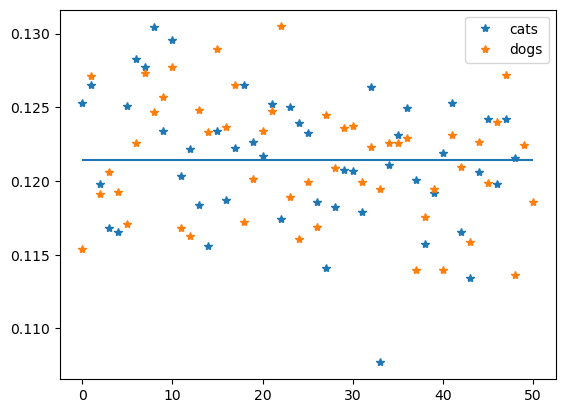

In [16]:
plot( net2(train_data[train_label==0]).view(-1).detach().numpy(), '*', label='cats')
plot( net2(train_data[train_label==1]).view(-1).detach().numpy(), '*', label='dogs')
hlines(net2(train_data).detach().numpy().mean(), 0, 50)
legend()

# Can see network is not trained yet, so there is no good separation
# Learn how to train the network in next segment